In [1]:
from dataclasses import dataclass
import matplotlib.pyplot as plt
import numpy as np
import sys

sys.path.append("..")

import aoc

In [2]:
@dataclass(frozen=True)
class Pixel:
    x: int
    y: int
        
    def neighbors(self):
        for dy in [-1, 0, 1]:
            for dx in [-1, 0, 1]:
                yield Pixel(self.x+dx, self.y+dy)

class Image:
    def __init__(self, dataset, algorithm, fill=0):
        self.dataset = dataset
        self.algorithm = algorithm
        self.fill = fill
        xs = [p.x for p in self.dataset]
        ys = [p.y for p in self.dataset]
        self.xmin = min(xs)
        self.xmax = max(xs)
        self.ymin = min(ys)
        self.ymax = max(ys)
    
    def get(self, p):
        if p.x < self.xmin or p.x > self.xmax or p.y < self.ymin or p.y > self.ymax:
            return self.fill
        elif p in self.dataset:
            return 1
        else:
            return 0
        
    def display(self):
        for j in range(self.ymin, self.ymax+1):
            for i in range(self.xmin, self.xmax+1):
                if self.get(Pixel(i,j)):
                    print("#", end="")
                else:
                    print(".", end="")
            print()

    def nextvalue(self, p):
        out = ""
        for np in p.neighbors():
            out += str(self.get(np))
        return int(out, 2)
    
    def enhance(self, buffer=2):
        nfill = None
        if self.algorithm[0] == 1:
            if self.fill:
                nfill = 0
            else:
                nfill = 1
        else:
            nfill = 0
        out = set()
        for j in range(self.ymin-buffer, self.ymax+1+buffer):
            for i in range(self.xmin-buffer, self.xmax+1+buffer):
                p = Pixel(i,j)
                if self.algorithm[self.nextvalue(p)]:
                    out.add(p)
        return Image(out, self.algorithm, fill=nfill)
    
    def as_array(self, buffer=0):
        data = []
        for y in range(self.ymin-buffer, self.ymax+1+buffer):
            data.append([])
            for x in range(self.xmin-buffer, self.xmax+1+buffer):
                e = self.get(Pixel(x,y))
                data[-1].append(e)
        return np.array(data, dtype=int)
    
    @classmethod
    def from_lines(cls, lines, algorithm):
        out = set()
        for j, line in enumerate(lines):
            for i, c in enumerate(line):
                if c == '#':
                    out.add(Pixel(i,j))
        return Image(out, algorithm)
        
class FileData:
    def __init__(self, filename):
        alines, imagelines = aoc.splitlist(aoc.readlines(filename), "")
        self.algorithm = self._build_algorithm(alines) 
        self.initimage = Image.from_lines(imagelines, self.algorithm)
        
    def _build_algorithm(self, alines):
        d = []
        for line in alines:
            for c in line:
                if c == '.':
                    d.append(0)
                elif c == '#':
                    d.append(1)
        return np.array(d, dtype=int)
    
test = FileData("test.txt")
print(len(test.algorithm))
print(test.initimage.nextvalue(Pixel(-1, -1)))

512
1


In [3]:
def part1(filedata, debug=False):
    img = filedata.initimage
    if debug:
        img.display()
        print()
    for _ in range(2):
        img = img.enhance()
        if debug:
            img.display()
            print()
    return len(img.dataset)

part1(test, debug=True)

#..#.
#....
##..#
..#..
..###

.##.##.
#..#.#.
##.#..#
####..#
.#..##.
..##..#
...#.#.

.......#.
.#..#.#..
#.#...###
#...##.#.
#.....#.#
.#.#####.
..#.#####
...##.##.
....###..



35

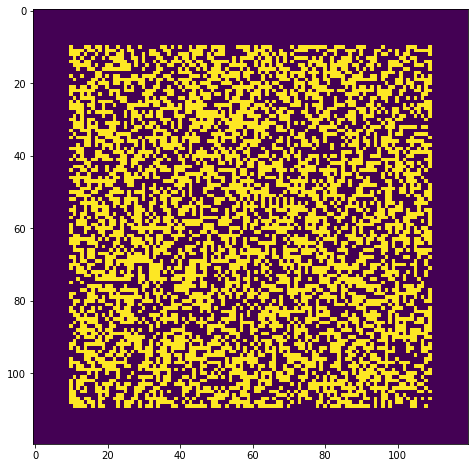

In [4]:
inp = FileData("input.txt")
plt.figure(figsize=(8,8))
plt.imshow(inp.initimage.as_array(buffer=10))
plt.show()

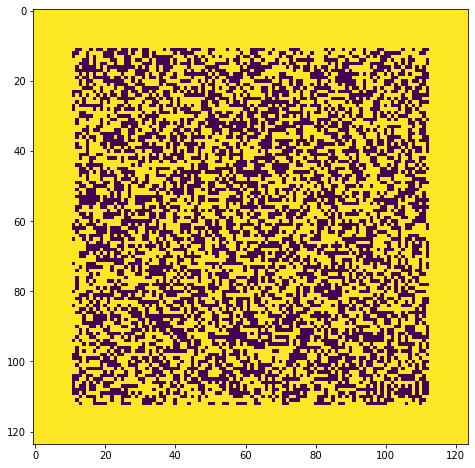

In [5]:
img2 = inp.initimage.enhance()
plt.figure(figsize=(8,8))
plt.imshow(img2.as_array(buffer=10))
plt.show()

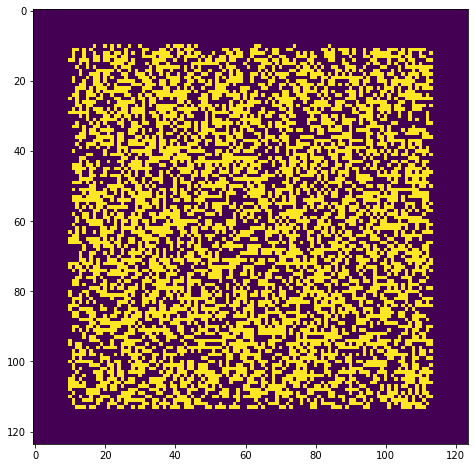

In [6]:
img3 = img2.enhance()
plt.figure(figsize=(8,8))
plt.imshow(img3.as_array(buffer=10))
plt.show()

In [7]:
len(img3.dataset)

5461

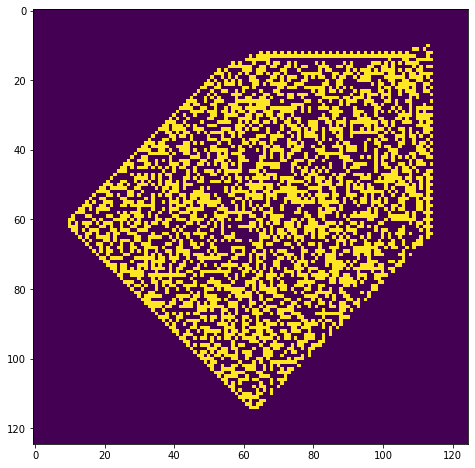

In [8]:
def part2(fd):
    img = fd.initimage
    for _ in range(50):
        img = img.enhance()
    return img

t50 = part2(test)
plt.figure(figsize=(8,8))
plt.imshow(t50.as_array(buffer=10))
plt.show()

In [9]:
len(t50.dataset)

3351

In [10]:
i50 = part2(inp)

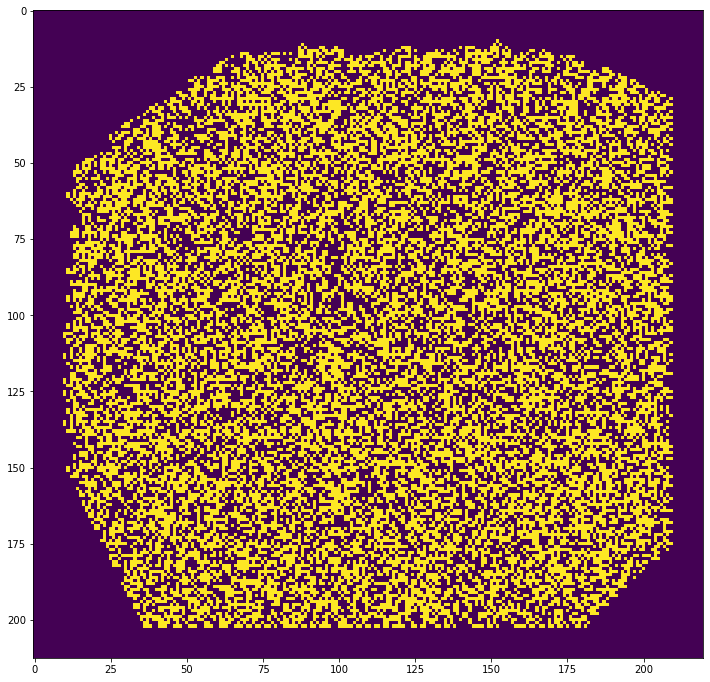

In [12]:
plt.figure(figsize=(12,12))
plt.imshow(i50.as_array(buffer=10))
plt.show()

In [13]:
len(i50.dataset)

18226